In [23]:
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_data(database_filepath):
    """Loads the data from a database file and returns the target."""

    engine = create_engine(f'sqlite:///{database_filepath}')
    df = pd.read_sql_table('emissions', engine)

    return df

In [19]:
df = load_data('../data_filled.db')
df.shape

(45511, 29)

In [20]:
df.head()

,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,fuel_type,...,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,J,M5,Manual,1598.0,Petrol,...,980.0,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,J,M5,Manual,1747.0,Petrol,...,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,K,M5,Manual,1970.0,Petrol,...,1103.0,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,J,M5,Manual,1598.0,Petrol,...,980.0,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,J,M5,Manual,1747.0,Petrol,...,1105.0,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN


In [18]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

In [26]:
def average_label_history(df):
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1 }
    df['tax_band_int'] = df['tax_band'].map(label_mapping)
    df_grouped = df[['year','tax_band_int']].groupby(by='year').mean()
    print(df_grouped)
    plt.plot(df_grouped)


      tax_band_int
year              
2000      3.605104
2001      3.701887
2002      3.671248
2003      3.993761
2004      3.877750
2005      4.410955
2006      4.308786
2007      4.289730
2008      4.575564
2009      4.910891
2010      5.367347
2011      6.115319
2012      6.761238
2013      7.253850


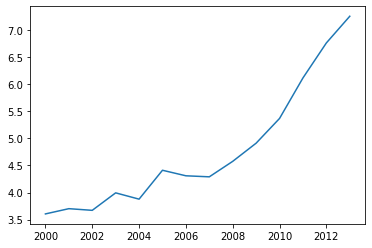

In [27]:
average_label_history(df)

In [28]:
df['manufacturer'].unique()

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lotus', 'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'],
      dtype=object)

In [76]:
def plot_average_label_history_by_manufacturer(df):
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1 }
    df['tax_band_int'] = df['tax_band'].map(label_mapping)
    df_grouped = df[['year','manufacturer','tax_band_int']].groupby(by=['manufacturer','year']).mean()
    
    for _, manufacturer in df_grouped.groupby(level=0):
        label = manufacturer.index.get_level_values(0)[0]
        x = manufacturer.index.get_level_values(1)
        y = manufacturer['tax_band_int'].values
        plt.plot(x, y, label=label)
        
    plt.xlabel('Year')
    plt.ylabel('Tax band mean')
    plt.legend()
    plt.show()

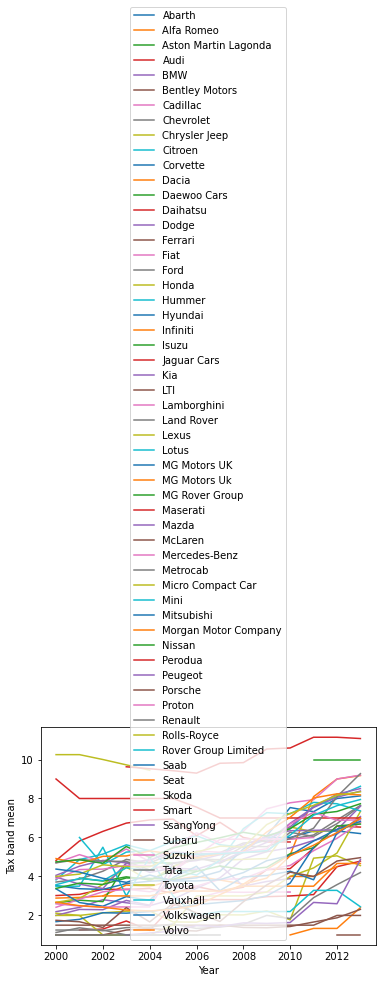

In [77]:
plot_average_label_history_by_manufacturer(df)

In [100]:
def plot_average_label_history_by_manufacturer_only_large(df):
    manufacturers = df['manufacturer'].value_counts()
    large_man = manufacturers.index[:10]
    df = df[df['manufacturer'].isin(large_man)]
    
    label_mapping = { 'A': 12, 'B': 11, 'C': 10, 'D': 9, 'E': 8, 'F': 7, 'G': 6, 'H': 5, 'I': 4, 'J': 3, 'K': 2, 'L': 1 }
    df['tax_band_int'] = df['tax_band'].map(label_mapping)
    df_grouped = df[['year','manufacturer','tax_band_int']].groupby(by=['manufacturer','year']).mean()
    
    for _, manufacturer in df_grouped.groupby(level=0):
        label = manufacturer.index.get_level_values(0)[0]
        x = manufacturer.index.get_level_values(1)
        y = manufacturer['tax_band_int'].values
        plt.plot(x, y, label=label)
        
    plt.xlabel('Year')
    plt.ylabel('Tax band mean')
    plt.legend()
    plt.show()
        


<ipython-input-100-aedcc5055b21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_band_int'] = df['tax_band'].map(label_mapping)


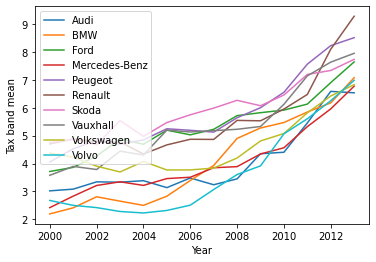

In [101]:
plot_average_label_history_by_manufacturer_only_large(df)